In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

Using TensorFlow backend.
C:\Users\faisal.maqbool\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\faisal.maqbool\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\faisal.maqbool\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint1

### Loading DataSet

In [2]:
df = pd.read_csv('EngineeredFeatures.csv')

In [3]:
df.shape

(33245, 66)

### Normalization

In [14]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x = df.values
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=df.columns)

In [4]:
df.head()

,insurance,marital_status,hospital_expire_flag,los,gender,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,peripheral_vascular,...,BloodGlucose,BloodLipase,BloodMagnesium,BloodPotassium,BloodSodium,PlateletCount,RedBloodCells,WhiteBloodCells,Lymphocytes,icd9_code
0,0,3,0,1.4876,0,0,0,0,0,0,...,180.298851,50.000000,1.926667,4.647959,130.703297,319.162500,3.814189,10.717333,10.822737,1
1,0,3,0,2.1954,0,0,0,0,0,1,...,180.298851,50.000000,1.926667,4.647959,130.703297,319.162500,3.814189,10.717333,10.822737,1
2,0,4,1,15.1118,1,1,1,1,1,0,...,140.161290,152.361111,1.941573,3.949057,140.677083,178.111111,2.839028,14.205479,10.822737,1
3,0,0,0,15.7093,0,1,1,1,1,0,...,138.066667,42.000000,1.874194,3.809375,138.222222,349.903226,3.224333,21.032258,10.822737,1
4,0,3,0,1.8364,0,0,0,0,0,0,...,165.756098,49.000000,1.906667,4.312195,135.365854,488.262295,3.541148,9.188710,10.822737,1


In [4]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=df.columns)

In [5]:
df.head()

,insurance,marital_status,hospital_expire_flag,los,gender,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,peripheral_vascular,...,BloodGlucose,BloodLipase,BloodMagnesium,BloodPotassium,BloodSodium,PlateletCount,RedBloodCells,WhiteBloodCells,Lymphocytes,icd9_code
0,0.0,0.500000,0.0,0.009664,0.0,0.0,0.0,0.0,0.0,0.0,...,0.224284,0.003677,0.267836,0.507993,0.433204,0.190941,0.407427,0.021616,0.120253,1.0
1,0.0,0.500000,0.0,0.014262,0.0,0.0,0.0,0.0,0.0,1.0,...,0.224284,0.003677,0.267836,0.507993,0.433204,0.190941,0.407427,0.021616,0.120253,1.0
2,0.0,0.666667,1.0,0.098174,1.0,1.0,1.0,1.0,1.0,0.0,...,0.169156,0.011359,0.270451,0.391509,0.561402,0.103901,0.239730,0.028806,0.120253,1.0
3,0.0,0.000000,0.0,0.102056,0.0,1.0,1.0,1.0,1.0,0.0,...,0.166280,0.003077,0.258630,0.368229,0.529849,0.209911,0.305990,0.042878,0.120253,1.0
4,0.0,0.500000,0.0,0.011930,0.0,0.0,0.0,0.0,0.0,0.0,...,0.204310,0.003602,0.264327,0.452033,0.493134,0.295290,0.360472,0.018465,0.120253,1.0


# Test-Train Split

In [6]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [84]:
df['icd9_code'].value_counts()

0.0    30491
1.0     2754
Name: icd9_code, dtype: int64

In [88]:
df["icd9_code"][(df["icd9_code"] == '996') & (df["hospital_expire_flag"] == '1')]

C:\Users\faisal.maqbool\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=0)

In [8]:
where_are_NaNs = np.isnan(X_train)
X_train[where_are_NaNs] = 0

In [9]:
where_are_NaNs = np.isnan(X_test)
X_test[where_are_NaNs] = 0

## Down Sampling

In [53]:
df_majority = df[df['icd9_code']==0.0]
df_minority = df[df['icd9_code']==1.0]

In [54]:
df_minority.shape

(2754, 66)

In [56]:
# Downsample majority class

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2754,     # to match minority class
                                 random_state=123) # reproducible results

In [57]:
df_majority_downsampled.shape

(2754, 66)

In [58]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [60]:
# Display new class counts
df_downsampled['icd9_code'].value_counts()

1.0    2754
0.0    2754
Name: icd9_code, dtype: int64

### Model Training

In [66]:
# Separate input features (X) and target variable (y)
y = df_downsampled['icd9_code']
X = df_downsampled.drop(['icd9_code'], axis=1)

where_are_NaNs = np.isnan(X)
X[where_are_NaNs] = 0

# Train model
clf_2 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_2 = clf_2.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_2 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_2))

[0. 1.]
0.6675744371822803


C:\Users\faisal.maqbool\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [67]:
X.shape

(5508, 65)

In [68]:
y.shape

(5508,)

# SVM

In [72]:
# Train model
clf_3 = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)
 
clf_3.fit(X, y)
 
# Predict on training set
pred_y_3 = clf_3.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_3 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_3) )
# 0.688
 
# What about AUROC?
prob_y_3 = clf_3.predict_proba(X)
prob_y_3 = [p[1] for p in prob_y_3]
print( roc_auc_score(y, prob_y_3) )

[0. 1.]
0.675199709513435
0.7378128017661245


# RandomForrest

In [76]:
# Train model
clf_4 = RandomForestClassifier()
clf_4.fit(X, y)
 
# Predict on training set
pred_y_4 = clf_4.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_4) )
 
# What about AUROC?
prob_y_4 = clf_4.predict_proba(X)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y, prob_y_4) )

C:\Users\faisal.maqbool\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0. 1.]
0.9907407407407407
0.9995834935281301


In [82]:
df_majority.shape

(30491, 66)

In [83]:
df_majority = df_majority.sample(6500)

In [84]:
df_majority.shape

(6500, 66)

# For Upsampling

In [85]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority, df_minority])

In [94]:
df_downsampled.shape

(9254, 66)

In [95]:
df_majority = df_downsampled[df_downsampled['icd9_code'] == 0.0]
df_minority = df_downsampled[df_downsampled['icd9_code'] == 1.0]

In [97]:
df_majority.shape

(6500, 66)

# Upsampled

In [99]:
# Separate majority and minority classes

 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=6500,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['icd9_code'].value_counts()

1.0    6500
0.0    6500
Name: icd9_code, dtype: int64

In [101]:
# Separate input features (X) and target variable (y)
y = df_upsampled['icd9_code']
X = df_upsampled.drop(['icd9_code'], axis=1)


where_are_NaNs = np.isnan(X)
X[where_are_NaNs] = 0
# Train model
clf_1 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_1 = clf_1.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_1))

C:\Users\faisal.maqbool\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0. 1.]
0.6671538461538462


In [102]:

# Predict class probabilities
prob_y_2 = clf_2.predict_proba(X)
 
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]
 
prob_y_2[:5]

[0.49044940146993565,
 0.41989383997765795,
 0.40641705893283653,
 0.2733401440384406,
 0.3186461486406362]

In [103]:
print( roc_auc_score(y, prob_y_2) )
# 0.568096626406

0.7249030769230769


# SVC on Upsampled dataset

In [104]:
# Train model
clf_3 = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)
 
clf_3.fit(X, y)
 
# Predict on training set
pred_y_3 = clf_3.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_3 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_3) )
 
# What about AUROC?
prob_y_3 = clf_3.predict_proba(X)
prob_y_3 = [p[1] for p in prob_y_3]
print( roc_auc_score(y, prob_y_3) )

[0. 1.]
0.6754615384615384
0.7319090414201184


# RandomForrest on Upsampled Data

In [105]:
clf_4 = RandomForestClassifier()
clf_4.fit(X, y)
 
# Predict on training set
pred_y_4 = clf_4.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_4) )
 
# What about AUROC?
prob_y_4 = clf_4.predict_proba(X)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y, prob_y_4) )

C:\Users\faisal.maqbool\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0. 1.]
0.9973846153846154
0.9999630532544379


In [108]:
confusion_matrix(y, pred_y_4)

array([[6492,    8],
       [  26, 6474]], dtype=int64)

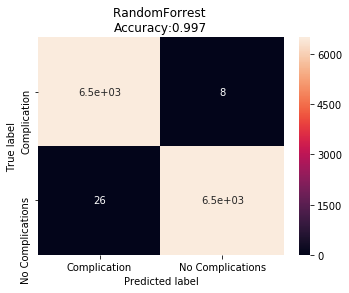

In [119]:
labels = ['complication', 'No Complication']
cm = confusion_matrix(y, pred_y_4) 

cm_df = pd.DataFrame(cm,
                     index = ['Complication','No Complications'], 
                     columns = ['Complication','No Complications'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('RandomForrest \nAccuracy:{0:.3f}'.format(accuracy_score(y, pred_y_4)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# ADASYN & SMOTE

In [57]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [58]:
where_are_NaNs = np.isnan(X)
X[where_are_NaNs] = 0

In [59]:
X.shape

(33245, 65)

In [60]:
y.shape

(33245,)

In [61]:
print('Original Target Variable Distribution: ',Counter(y))

Original Target Variable Distribution:  Counter({0.0: 30491, 1.0: 2754})


In [19]:
ada = ADASYN(sampling_strategy='minority',random_state=420, n_neighbors=5)
X_res,y_res = ada.fit_resample(X,y)

In [20]:
print('OverSampling Target Variable Distribution: ', Counter(y_res))

OverSampling Target Variable Distribution:  Counter({1.0: 30755, 0.0: 30491})


In [22]:
clf_1 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_1 = clf_1.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_1))

[0. 1.]
0.9168596781470898


C:\Users\faisal.maqbool\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
confusion_matrix(y, pred_y_1)

array([[30471,    20],
       [ 2744,    10]], dtype=int64)

In [28]:
recall_score(y, pred_y_1)

0.0036310820624546117

# Logistic Regression

In [32]:
clf_1 = LogisticRegression().fit(X_train, y_train)
 
# Predict on training set
y_pred = clf_1.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( y_pred ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, y_pred))

[0. 1.]
0.6878092222442114


C:\Users\faisal.maqbool\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
recall_score(y_test, y_pred)

0.7169792791908082

# SMOTE

In [62]:

smt = SMOTE()
X_train, y_train = smt.fit_sample(X, y)

In [63]:
len(y_test)

20212

In [64]:
clf_1 = LogisticRegression().fit(X_train, y_train)
 
# Predict on training set
y_pred = clf_1.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( y_pred ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, y_pred))

[0. 1.]
0.6853354442905205


C:\Users\faisal.maqbool\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [65]:
recall_score(y_test, y_pred)

0.7058823529411765

# LinearSVC

In [ ]:
# Train model
clf_3 = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)
 
clf_3.fit(X_train, y_train)
 
# Predict on training set
pred_y_3 = clf_3.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_3 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_3) )
 
# What about AUROC?
prob_y_3 = clf_3.predict_proba(X_test)
prob_y_3 = [p[1] for p in prob_y_3]
print( roc_auc_score(y_test, prob_y_3))

# ADASYN

In [10]:
len(X_train)

22274

In [11]:
len(X_test)

10971

In [12]:
len(y_test)

10971

In [13]:
len(y_train)

22274

In [14]:
ada = ADASYN(sampling_strategy='minority',random_state=420, n_neighbors=5)
X_train,y_train = ada.fit_resample(X_train,y_train)

In [15]:
where_are_NaNs = np.isnan(X_train)
X_train[where_are_NaNs] = 0

In [16]:
where_are_NaNs = np.isnan(X_test)
X_test[where_are_NaNs] = 0

# Random Forrest

In [14]:
clf_4 = RandomForestClassifier()
clf_4.fit(X_train, y_train)
 
# Predict on training set
pred_y_4 = clf_4.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_4) )
 
# What about AUROC?
prob_y_4 = clf_4.predict_proba(X_test)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y_test, prob_y_4))

[0. 1.]
0.9121319843223042
0.8359829527622593


### Recall

In [16]:
recall_score(y_test, pred_y_4)

0.3592552026286966

In [18]:
confusion_matrix(y_test, pred_y_4)

array([[9679,  379],
       [ 585,  328]], dtype=int64)

# Logistic Regression

### Training

In [32]:
clf_1 = LogisticRegression().fit(X_train, y_train)
 
# Predict on training set
pred_y_1 = clf_1.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_1))

[0. 1.]
0.6562756357670222


C:\Users\faisal.maqbool\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Recall

In [33]:
recall_score(y_test, pred_y_1)

0.6692223439211391

### AUROC

In [34]:
# What about AUROC?
prob_y_3 = clf_1.predict_proba(X_test)
prob_y_3 = [p[1] for p in prob_y_3]
print( roc_auc_score(y_test, prob_y_3))

0.7240146253591164


# LinearSVC

In [20]:
# Train model
from sklearn.calibration import CalibratedClassifierCV

model_svc = LinearSVC()
clf_3 = CalibratedClassifierCV(model_svc) 

clf_3.fit(X_train, y_train)
 
# Predict on training set
pred_y_3 = clf_3.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_3 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_3))
 
# What about AUROC?
prob_y_3 = clf_3.predict_proba(X_test)
prob_y_3 = [p[1] for p in prob_y_3]
print( roc_auc_score(y_test, prob_y_3))

[0. 1.]
0.6657551727281014
0.7203307345327006


In [22]:
recall_score(y_test, pred_y_3)

0.6593647316538883

# Neural Network

In [17]:

# Transfer data to NN format

x_val = X_test
partial_x_train = X_train
y_val = y_test
partial_y_train = y_train

print("partial_x_train ", partial_x_train.shape)
print("partial_y_train ", partial_y_train.shape)

print("x_val ", x_val.shape)
print("y_val ", y_val.shape)

partial_x_train  (41274, 65)
partial_y_train  (41274,)
x_val  (10971, 65)
y_val  (10971,)


In [65]:
from sklearn.svm import SVR, LinearSVR,LinearSVC
from sklearn.kernel_ridge import KernelRidge

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [31]:
# NN MODEL
from keras import models
model = models.Sequential()
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001),input_shape=(partial_x_train.shape[1],)))
#model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='mse', metrics=['mae'])
print("model compiled")

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2048)              135168    
_________________________________________________________________
dropout_5 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_6 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_7 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 2048)             

In [32]:
history = model.fit(partial_x_train, partial_y_train,
                    validation_data=(x_val, y_val), 
                    verbose=1,
                   epochs=10)

Train on 41274 samples, validate on 10971 samples
Epoch 1/10
41274/41274 [==============================] - 447s 11ms/step - loss: 2.8753 - mae: 0.4431 - val_loss: 1.0760 - val_mae: 0.3114
Epoch 2/10
41274/41274 [==============================] - 489s 12ms/step - loss: 0.6604 - mae: 0.3679 - val_loss: 0.3966 - val_mae: 0.3310
Epoch 3/10
41274/41274 [==============================] - 493s 12ms/step - loss: 0.2882 - mae: 0.3001 - val_loss: 0.2066 - val_mae: 0.2168
Epoch 4/10
41274/41274 [==============================] - 487s 12ms/step - loss: 0.2056 - mae: 0.2596 - val_loss: 0.2239 - val_mae: 0.2766
Epoch 5/10
41274/41274 [==============================] - 480s 12ms/step - loss: 0.1764 - mae: 0.2344 - val_loss: 0.1947 - val_mae: 0.2622
Epoch 6/10
41274/41274 [==============================] - 468s 11ms/step - loss: 0.1612 - mae: 0.2187 - val_loss: 0.1761 - val_mae: 0.2298
Epoch 7/10
41274/41274 [==============================] - 442s 11ms/step - loss: 0.1505 - mae: 0.2059 - val_loss: 0.

# Accuracy Plot

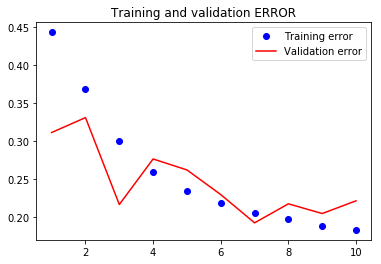

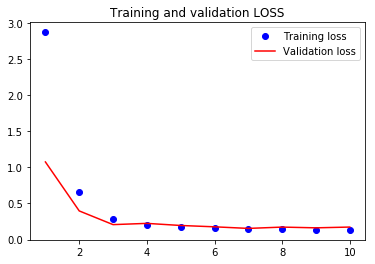

In [34]:
acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training error')
plt.plot(epochs, val_acc, 'r', label='Validation error')
plt.title('Training and validation ERROR')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation LOSS')
plt.legend()
plt.show()

In [45]:
model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='mse', metrics=['accuracy'])
print("model compiled")

model compiled


# Accuracy

In [46]:
model.evaluate(X_test, y_test)

10971/10971 [==============================] - 20s 2ms/step


[0.17276376546197988, 0.8146932721138]

# SMOTE Implementation

In [47]:
from imblearn.over_sampling import SMOTE

In [50]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [51]:
where_are_NaNs = np.isnan(X_train)
X_train[where_are_NaNs] = 0

In [52]:
where_are_NaNs = np.isnan(X_test)
X_test[where_are_NaNs] = 0

In [54]:
len(X_train)

41682

# Random Forrest

In [53]:
clf_4 = RandomForestClassifier()
clf_4.fit(X_train, y_train)
 
# Predict on training set
pred_y_4 = clf_4.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_4) )
 
# What about AUROC?
prob_y_4 = clf_4.predict_proba(X_test)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y_test, prob_y_4))

[0. 1.]
0.914319569774861
0.8387240641736853


In [56]:
recall_score(y_test, pred_y_4)


0.36801752464403065

In [57]:

confusion_matrix(y_test, pred_y_4)

array([[9695,  363],
       [ 577,  336]], dtype=int64)

# Logistic Regression

In [58]:
clf_1 = LogisticRegression().fit(X_train, y_train)
 
# Predict on training set
pred_y_1 = clf_1.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_1))

[0. 1.]
0.6710418375717802


C:\Users\faisal.maqbool\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [59]:
recall_score(y_test, pred_y_1)

0.6593647316538883

In [60]:
prob_y_3 = clf_1.predict_proba(X_test)
prob_y_3 = [p[1] for p in prob_y_3]
print( roc_auc_score(y_test, prob_y_3))

0.7211834013325125


# LinearSVC

In [66]:
# Train model
from sklearn.calibration import CalibratedClassifierCV

model_svc = LinearSVC()
clf_3 = CalibratedClassifierCV(model_svc) 

clf_3.fit(X_train, y_train)
 
# Predict on training set
pred_y_3 = clf_3.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_3 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_3))
 
# What about AUROC?
prob_y_3 = clf_3.predict_proba(X_test)
prob_y_3 = [p[1] for p in prob_y_3]
print( roc_auc_score(y_test, prob_y_3))

[0. 1.]
0.6707683893902106
0.7205095440965947


In [67]:
recall_score(y_test, pred_y_3)

0.651697699890471

# NN

In [68]:
# Transfer data to NN format

x_val = X_test
partial_x_train = X_train
y_val = y_test
partial_y_train = y_train

print("partial_x_train ", partial_x_train.shape)
print("partial_y_train ", partial_y_train.shape)

print("x_val ", x_val.shape)
print("y_val ", y_val.shape)

partial_x_train  (41682, 65)
partial_y_train  (41682,)
x_val  (10971, 65)
y_val  (10971,)


In [69]:
# NN MODEL
from keras import models
model = models.Sequential()
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001),input_shape=(partial_x_train.shape[1],)))
#model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='mse', metrics=['mae'])
print("model compiled")

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2048)              135168    
_________________________________________________________________
dropout_9 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dropout_10 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dropout_11 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 2048)             

In [70]:
history = model.fit(partial_x_train, partial_y_train,
                    validation_data=(x_val, y_val), 
                    verbose=1,
                   epochs=10)

Train on 41682 samples, validate on 10971 samples
Epoch 1/10
41682/41682 [==============================] - 539s 13ms/step - loss: 2.8526 - mae: 0.4417 - val_loss: 1.0861 - val_mae: 0.3514
Epoch 2/10
41682/41682 [==============================] - 508s 12ms/step - loss: 0.6449 - mae: 0.3689 - val_loss: 0.3670 - val_mae: 0.3094
Epoch 3/10
41682/41682 [==============================] - 547s 13ms/step - loss: 0.2843 - mae: 0.3005 - val_loss: 0.2873 - val_mae: 0.3394
Epoch 4/10
41682/41682 [==============================] - 527s 13ms/step - loss: 0.2044 - mae: 0.2580 - val_loss: 0.2259 - val_mae: 0.2921
Epoch 5/10
41682/41682 [==============================] - 525s 13ms/step - loss: 0.1767 - mae: 0.2352 - val_loss: 0.1835 - val_mae: 0.2347
Epoch 6/10
41682/41682 [==============================] - 491s 12ms/step - loss: 0.1616 - mae: 0.2200 - val_loss: 0.1548 - val_mae: 0.1933
Epoch 7/10
41682/41682 [==============================] - 519s 12ms/step - loss: 0.1514 - mae: 0.2075 - val_loss: 0.

# Accuracy

In [72]:
model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='mse', metrics=['accuracy'])
print("model compiled")

model compiled


In [73]:
model.evaluate(X_test, y_test)

10971/10971 [==============================] - 20s 2ms/step


[0.15348534610096295, 0.8433141708374023]

# NEAR MISS Implementation

In [75]:
from imblearn.under_sampling import NearMiss

In [76]:
nr = NearMiss()
X_train, y_train = nr.fit_sample(X_train, y_train)

In [77]:
where_are_NaNs = np.isnan(X_train)
X_train[where_are_NaNs] = 0

In [78]:
where_are_NaNs = np.isnan(X_test)
X_test[where_are_NaNs] = 0

In [82]:
clf_1 = LogisticRegression().fit(X_train, y_train)
 
# Predict on training set
pred_y_1 = clf_1.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_1))

[0. 1.]
0.6703126424209279


C:\Users\faisal.maqbool\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
